Structured Data Overview:
       product_id       views   purchases  click_through_rate  conversion_rate
count    4.000000     4.00000    4.000000            4.000000         4.000000
mean   102.500000   875.00000   87.500000            0.095000         0.095418
std      1.290994   290.11492   40.311289            0.024152         0.024494
min    101.000000   500.00000   30.000000            0.060000         0.060000
25%    101.750000   762.50000   75.000000            0.090000         0.090000
50%    102.500000   900.00000  100.000000            0.102500         0.102941
75%    103.250000  1012.50000  112.500000            0.107500         0.108359
max    104.000000  1200.00000  120.000000            0.115000         0.115789


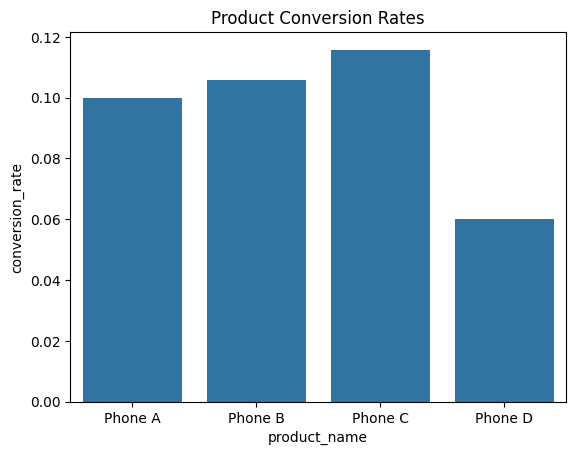

Top keywords from reviews:
['affordable' 'amazing' 'battery' 'camera' 'daily' 'decent' 'drains'
 'fast' 'fine' 'great']
Normalized Summary:
  product_name  views_norm  conversion_rate_norm  sentiment_score_norm
0      Phone A    1.293548              0.216004              0.762001
1      Phone B   -0.099504              0.493306              1.016001
2      Phone C    0.298511              0.960341             -0.254000
3      Phone D   -1.492556             -1.669651             -1.524002


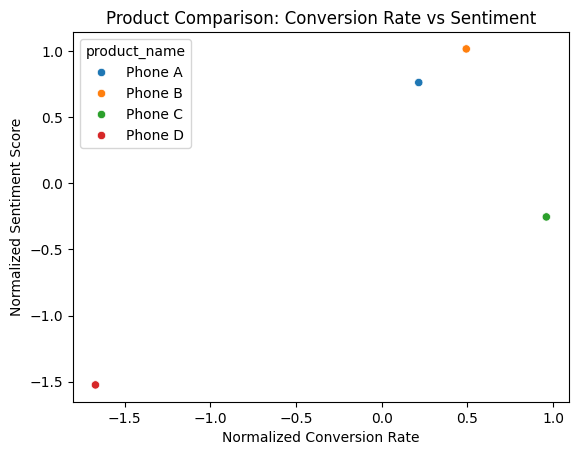

In [1]:
# ===============================
# 1. Import Required Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# ===============================
# 2. Load Sample Structured Data
# ===============================

# Simulated Snowflake dataset sample (views, CTR, etc.)
df_structured = pd.DataFrame({
    'product_id': [101, 102, 103, 104],
    'product_name': ['Phone A', 'Phone B', 'Phone C', 'Phone D'],
    'views': [1200, 850, 950, 500],
    'purchases': [120, 90, 110, 30],
    'click_through_rate': [0.10, 0.105, 0.115, 0.06]
})

# Basic metrics
df_structured['conversion_rate'] = df_structured['purchases'] / df_structured['views']

# ===============================
# 3. Load Sample Unstructured Data
# ===============================

# Simulated scraped reviews
df_reviews = pd.DataFrame({
    'product_id': [101, 101, 102, 103, 103, 104],
    'review_text': [
        "Great phone, very fast and reliable.",
        "Battery drains fast but camera is amazing.",
        "Affordable and works fine for daily use.",
        "Overheats quickly, not happy with the performance.",
        "Decent value for the price.",
        "Terrible speaker, won’t recommend."
    ]
})

# ===============================
# 4. Basic EDA - Structured Data
# ===============================
print("Structured Data Overview:")
print(df_structured.describe())

sns.barplot(x='product_name', y='conversion_rate', data=df_structured)
plt.title("Product Conversion Rates")
plt.show()

# ===============================
# 5. Basic Text Processing - Reviews
# ===============================
# Clean and vectorize reviews
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_reviews['review_text'])

# Print top keywords
print("Top keywords from reviews:")
print(vectorizer.get_feature_names_out()[:10])

# ===============================
# 6. Aggregating Sentiment (Mock)
# ===============================
# Placeholder for sentiment score (mock values)
df_reviews['sentiment_score'] = [4.5, 3.0, 4.0, 2.0, 3.5, 1.5]

# Merge structured and unstructured data
df_summary = df_structured.merge(
    df_reviews.groupby('product_id')['sentiment_score'].mean().reset_index(),
    on='product_id',
    how='left'
)

# ===============================
# 7. Normalization
# ===============================
scaler = StandardScaler()
df_summary[['views_norm', 'conversion_rate_norm', 'sentiment_score_norm']] = scaler.fit_transform(
    df_summary[['views', 'conversion_rate', 'sentiment_score']]
)

print("Normalized Summary:")
print(df_summary[['product_name', 'views_norm', 'conversion_rate_norm', 'sentiment_score_norm']])

# ===============================
# 8. Visualization
# ===============================
sns.scatterplot(
    x='conversion_rate_norm',
    y='sentiment_score_norm',
    hue='product_name',
    data=df_summary
)
plt.title("Product Comparison: Conversion Rate vs Sentiment")
plt.xlabel("Normalized Conversion Rate")
plt.ylabel("Normalized Sentiment Score")
plt.show()
